<a href="https://colab.research.google.com/github/Thivadee19/Machine-Learning_Advance-Data-Analytic_Assignment-/blob/main/Thivadee_Student_Pass_Fail_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Questions - 10 pts

List your research questions (at least 3 questions)
Data info: Description about data source and reference# New Section

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data Acquisition - 10 pts

Information on dataset, data type (csv or other format) and research questions
Information on data collection techniques and details# New Section

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Thivadee19/Machine-Learning_Advance-Data-Analytic_Assignment-/main/Student-Pass-Fail-Data.csv')

In [4]:
missing_values = ["n/a", "na", "--", "?"]

Data Wrangling - 20 pts

Data Wrangling strategy for answering your research questions
Data Wrangling Code
Provide code and detailed analysis along with some statistical insights for your underlying data

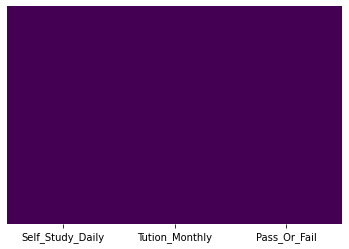

In [12]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
df

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0
...,...,...,...
995,6,22,1
996,9,30,1
997,3,39,0
998,7,25,1


In [6]:
df.describe()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
count,1000.000000,1000.000000,1000.000000
mean,5.744000,31.230000,0.499000
std,2.121076,5.976355,0.500249
min,0.000000,20.000000,0.000000
25%,4.000000,26.000000,0.000000
50%,6.000000,30.000000,0.000000
75%,7.000000,36.000000,1.000000
max,10.000000,50.000000,1.000000


In [7]:
df.shape

(1000, 3)

In [8]:
df.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


EDA (Exploratory Data Analysis) - 15 pts

Plot graphs/ charts/figures and add your observation for each plot. Also provide some statistical insights/ interpretation for your graphs/ plots

In [10]:
df.columns

Index(['Self_Study_Daily', 'Tution_Monthly', 'Pass_Or_Fail'], dtype='object')

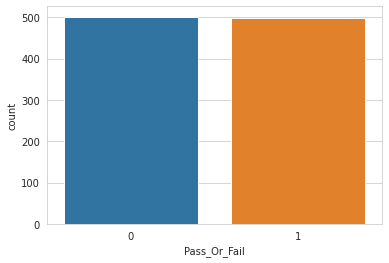

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Pass_Or_Fail', data=df)
## I asssumed 0 is pass student and 1 is fail. if it so, the we have only a tiny bit for Pass student more than Fail student. 

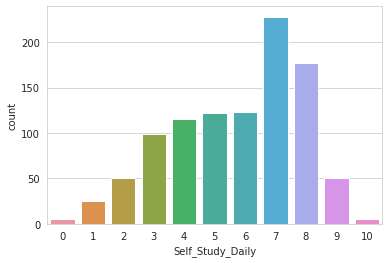

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Self_Study_Daily', data=df)
## This is show  the average of Self study (It ddoesn't say what if this is the number of hour? I assumed it the number of the hour of salf study per day) so here we can see average around5-6hr, highest would be 7hr. and lowerest is 1hr a day.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


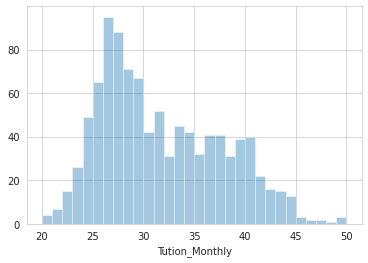

In [17]:
sns.distplot(df['Tution_Monthly'].dropna(), kde=False, bins=30)
## From this plot we can see the tuition fee that is around 25-30 that people pay the most. and very low around 45-50 tuition fee probably because it's expensive. 

Machine Learning Model - 30 pts

Build machine learning model
Evaluate the model
Select and optimize the model
Business justification for the ML model

In [28]:
X = df[['Self_Study_Daily','Tution_Monthly']]

In [32]:
X.head()

,Self_Study_Daily,Tution_Monthly
0,7,27
1,2,43
2,7,26
3,8,29
4,3,42


In [34]:
X.shape

(1000, 2)

In [23]:
df.columns

Index(['Self_Study_Daily', 'Tution_Monthly', 'Pass_Or_Fail'], dtype='object')

In [29]:
df1 = df.drop(['Tution_Monthly'], axis = 1)

In [30]:
y = df[['Pass_Or_Fail']]


In [31]:
y.head()

,Pass_Or_Fail
0,1
1,0
2,1
3,1
4,0


In [33]:
y.shape

(1000, 1)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logReg = LogisticRegression()

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 2)
(250, 2)
(750, 1)
(250, 1)


In [41]:
logReg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = logReg.predict(x_test)

In [43]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0])

In [44]:
y_test.values[0:10]

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]])

In [45]:
y_pred[0:10]

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [46]:
logReg.score(x_test,y_test)

0.988

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test,y_pred)

array([[116,   3],
       [  0, 131]])

In [50]:
cm = confusion_matrix(y_test,y_pred)

Text(0.5, 15.0, 'predicted value')

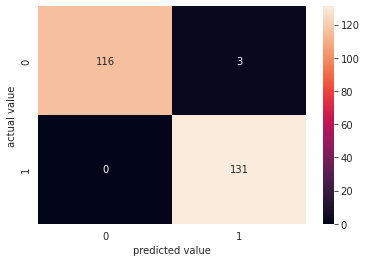

In [51]:
sns.heatmap(cm,annot=True,fmt='0.0f')
plt.ylabel('actual value')
plt.xlabel('predicted value')

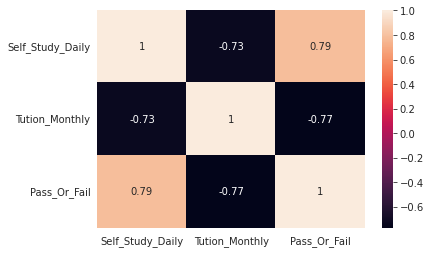

In [52]:
sns.heatmap(df.corr(),annot=True)

Conclusion - 15 pts

Provide logical conclusion for your data analysis work aligning with your research questions
Final conclusion of your data analysis work

Conclusion :  Overall afther I explored the data I can see that Pass and Fail student number is not different at all. Yes, Pass is more than Fail student but base on the Bar chart tell me that it only a tiny bit different. 
and for the daily hour study, most of student are study about 7hr daily. lowest is 1 hr. and supringly that the number of student who study for 9hr and only 2hr is a same. 
for the tuition, regular rate of the tuition is about 25-30 and very at 45-50 because I think it expensive for most student. 
Overall I apply the ML it was a pretty good score at 0.98 so it did well with the predicted result. not sure if that because of they don't much data and complicated missing value and none value thing like that but it better than I expected. 